# Dataset Analysis

In [27]:
# Import necessary libraries
import IPython.display as ipd  # For handling audio playback in Jupyter Notebook
import numpy as np  # Numerical computations
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Plotting and visualization
import seaborn as sns  # Statistical data visualization
from sklearn.preprocessing import MultiLabelBinarizer  # Encoding categorical data

import utils  # Custom utility functions (ensure this module is available)

# Function to initialize visualization settings (for reusability)
def configure_visualizations(context="notebook", font_scale=1.5, figsize=(17, 5)):
    """
    Configures the visualization settings for Seaborn and Matplotlib.

    Parameters:
    - context (str): Context setting for Seaborn (e.g., 'notebook', 'paper', 'talk', 'poster')
    - font_scale (float): Scaling factor for font sizes in plots
    - figsize (tuple): Default figure size for Matplotlib plots

    Returns:
    - None
    """
    sns.set_context(context, font_scale=font_scale)
    plt.rcParams['figure.figsize'] = figsize

# Apply the visualization settings
configure_visualizations()


In [28]:
# Load FMA dataset files (metadata, genres, features, and Echonest features)
def load_fma_datasets():
    """
    Loads FMA dataset files including metadata, genres, features, and Echonest features.

    Returns:
    - tracks (DataFrame): Track metadata.
    - genres (DataFrame): Genre information.
    - features (DataFrame): Extracted audio features.
    - echonest (DataFrame): Echonest-provided audio features.
    """
    try:
        tracks = utils.load('data/fma_metadata/tracks.csv')       # Track metadata
        genres = utils.load('data/fma_metadata/genres.csv')       # Genre information
        features = utils.load('data/fma_metadata/features.csv')   # Extracted audio features
        echonest = utils.load('data/fma_metadata/echonest.csv')   # Echonest-provided audio features
        return tracks, genres, features, echonest
    except Exception as e:
        raise RuntimeError(f"Error loading datasets: {e}")

# Load the datasets
tracks, genres, features, echonest = load_fma_datasets()

# Function to validate dataset consistency
def validate_fma_datasets(tracks, features, echonest):
    """
    Ensures consistency across FMA datasets by verifying index alignment.

    Parameters:
    - tracks (DataFrame): Track metadata.
    - features (DataFrame): Extracted audio features.
    - echonest (DataFrame): Echonest-provided audio features.

    Raises:
    - AssertionError: If the indices do not match expectations.
    """
    try:
        # Verify that 'features' and 'tracks' have the same index (track IDs should match)
        np.testing.assert_array_equal(features.index, tracks.index)

        # Check if all Echonest indices exist in the tracks dataset
        assert echonest.index.isin(tracks.index).all(), "Some Echonest data points are missing in tracks."

        print("✅ Dataset validation successful: All indices match correctly.")
    
    except AssertionError as error:
        raise ValueError(f"Dataset validation failed: {error}")

# Validate dataset consistency
validate_fma_datasets(tracks, features, echonest)

# Display dataset shapes (useful for debugging and understanding dataset size)
def display_dataset_shapes(tracks, genres, features, echonest):
    """
    Prints the shapes of the FMA datasets for debugging and analysis.

    Parameters:
    - tracks (DataFrame): Track metadata.
    - genres (DataFrame): Genre information.
    - features (DataFrame): Extracted audio features.
    - echonest (DataFrame): Echonest-provided audio features.
    """
    print(f"Dataset Shapes:\n"
          f"- Tracks: {tracks.shape}\n"
          f"- Genres: {genres.shape}\n"
          f"- Features: {features.shape}\n"
          f"- Echonest: {echonest.shape}")

# Display dataset information
display_dataset_shapes(tracks, genres, features, echonest)


✅ Dataset validation successful: All indices match correctly.
Dataset Shapes:
- Tracks: (106574, 52)
- Genres: (163, 4)
- Features: (106574, 518)
- Echonest: (13129, 249)


#  1.Dataset Size

In [29]:
def get_dataset_sizes(tracks, genres, features, echonest):
    """
    Creates a DataFrame summarizing the number of rows and columns for each dataset.

    Parameters:
    - tracks (DataFrame): Track metadata.
    - genres (DataFrame): Genre information.
    - features (DataFrame): Extracted audio features.
    - echonest (DataFrame): Echonest-provided audio features.

    Returns:
    - DataFrame: Summary table with dataset names, row counts, and column counts.
    """
    dataset_info = {
        "Dataset": ["Tracks", "Genres", "Features", "Echonest"],
        "Rows": [len(tracks), len(genres), len(features), len(echonest)],
        "Columns": [tracks.shape[1], genres.shape[1], features.shape[1], echonest.shape[1]]
    }
    return pd.DataFrame(dataset_info)

# Generate dataset size summary
df_sizes = get_dataset_sizes(tracks, genres, features, echonest)

# Display the dataset summary in Jupyter Notebook
from IPython.display import display
display(df_sizes)

,Dataset,Rows,Columns
0,Tracks,106574,52
1,Genres,163,4
2,Features,106574,518
3,Echonest,13129,249


# FMA Dataset Overview

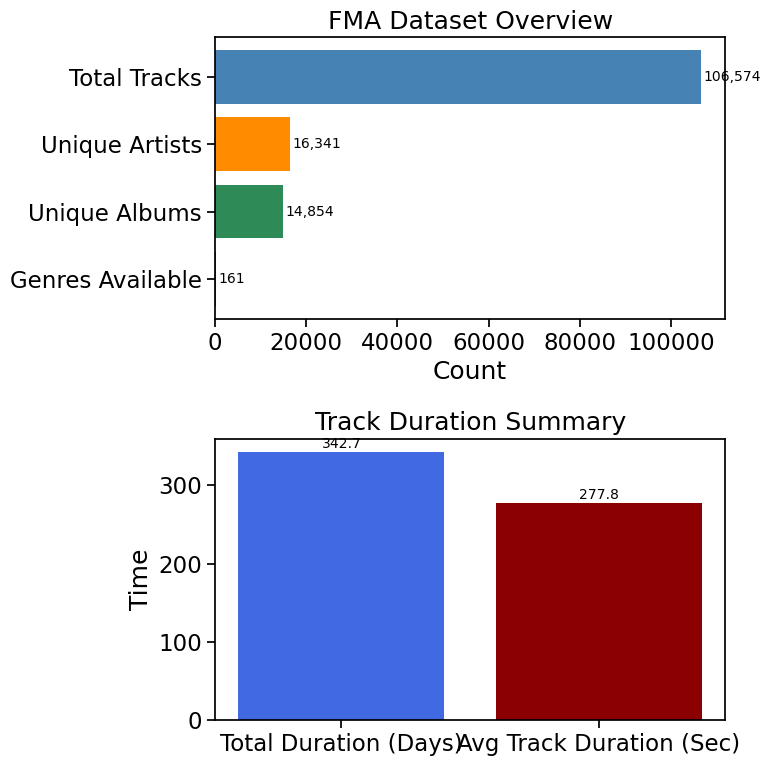

small    8000 tracks  2.8 days
medium  17000 tracks  5.9 days
large   81574 tracks  28.3 days


In [30]:
# 🔧 Fix MultiIndex Issue: Flatten column names
tracks.columns = ["_".join(col) if isinstance(col, tuple) else col for col in tracks.columns]

# 📊 Summarizing FMA Dataset
total_tracks = len(tracks)
total_artists = tracks["artist_id"].nunique()  # Unique artists
total_albums = tracks["album_id"].nunique()  # Unique albums
total_genres = sum(genres["#tracks"] > 0)  # Available genres

# 🎵 Track Duration Summary
mean_duration = tracks["track_duration"].mean()
total_duration_days = tracks["track_duration"].sum() / 3600 / 24  # Convert seconds to days

# 📌 Data for Visualization
summary_labels = ["Total Tracks", "Unique Artists", "Unique Albums", "Genres Available"]
summary_values = [total_tracks, total_artists, total_albums, total_genres]

# 🔍 Adjust Figure Size for Better Proportion
fig, axes = plt.subplots(2, 1, figsize=(8, 8))  

# 📊 First Chart: Dataset Overview
axes[0].barh(summary_labels, summary_values, color=["steelblue", "darkorange", "seagreen", "firebrick"])
axes[0].set_xlabel("Count")
axes[0].set_title("FMA Dataset Overview")

# 📝 Add precise values next to bars
for index, value in enumerate(summary_values):
    axes[0].text(value + 500, index, f"{value:,}", va="center", fontsize=10)

axes[0].invert_yaxis()  # Invert Y-axis for better readability

# ⏳ Second Chart: Track Duration Summary
duration_labels = ["Total Duration (Days)", "Avg Track Duration (Sec)"]
duration_values = [total_duration_days, mean_duration]

axes[1].bar(duration_labels, duration_values, color=["royalblue", "darkred"])
axes[1].set_title("Track Duration Summary")
axes[1].set_ylabel("Time")

# 📝 Add precise values above bars
for index, value in enumerate(duration_values):
    axes[1].text(index, value + 5, f"{value:.1f}", ha="center", fontsize=10)

plt.tight_layout()
plt.show()

print("="*100)

# 🎵 Subset Analysis: Fix filtering issue
for subset in tracks["set_subset"].unique():
    subset_data = tracks[tracks["set_subset"] == subset]
    print('{:6} {:6} tracks  {:.1f} days'.format(
        subset, len(subset_data), len(subset_data) * 30 / 3600 / 24))

# 2.Dataset DataFrames Details

These four dataframes contain different aspects of the Free Music Archive (FMA) dataset, each serving a specific purpose.

---

##  1. Tracks Dataset
- **Entries:** 106,574 tracks  
- **Columns:** 52  
- **Description:**  
  - Contains metadata about music tracks, including **album, artist, track details, and genre labels**.
  - Includes timestamps like **date created, date released**, and user interactions like **favorites and listens**.
  - **Track-specific features** include **bit rate, duration, language code, and license type**.
- **Use Case in ML:**  
  - **Genre classification** (using `track, genre_top`)   
  - **Trend analysis** (release dates, artist popularity)  

---

##  2. Genres Dataset
- **Entries:** 163 genres  
- **Columns:** 4  
- **Description:**  
  - Defines the **hierarchy of music genres**, including **parent-child relationships**.
  - Tracks count per genre (`#tracks`) helps analyze genre distribution.
- **Use Case in ML:**  
  - **Genre classification** (mapping genres to tracks)  
  - **Genre hierarchy exploration** (for hierarchical classification)  

---

##  3. Features Dataset
- **Entries:** 106,574 tracks  
- **Columns:** 518  
- **Description:**  
  - Contains **extracted audio features** for each track.
  - Features include **chroma, MFCC, spectral properties, zero-crossing rate, etc.**.
  - Each feature has **statistical summaries** (mean, standard deviation, kurtosis, etc.).
- **Use Case in ML:**  
  - **Genre classification** (using audio patterns)  
  - **Feature selection & correlation analysis**  
  - **Music similarity analysis**  

---

##  4. Echonest Dataset
- **Entries:** 13,129 tracks  
- **Columns:** 249  
- **Description:**  
  - Extracted **audio & temporal features** from **Echonest API**.
  - Includes **acousticness, danceability, energy, tempo, and valence**.
  - Some metadata like album release date is also present.
- **Use Case in ML:**  
  - **Music recommendation systems**  
  - **Genre classification** (combining with Features dataset)  
  - **Mood-based music tagging**  

---

## Our Goal
- Use **Tracks & Genres** for **metadata-driven analysis**.
- Use **Features & Echonest** for **audio-driven classification & recommendations**.
- Prepare these datasets for training **Logistic Regression, kNN, SVM, and MLP models**.
"""

In [31]:
# Iterate over datasets and display their info and first few rows
for name, df in zip(["Tracks", "Genres", "Features", "Echonest"], 
                     [tracks, genres, features, echonest]):
    print(f"{name} Dataset:")

    # Display dataset information: column data types, missing values, and memory usage
    print("-" * 30, "Dataset Info", "-" * 30)
    df.info()  # Prints dataset info (does not return anything)

    # Display the first 5 rows of the dataset
    print("\n", "-" * 30, "First 5 Rows", "-" * 30)
    display(df.head())  

    # Print a separator for better readability between datasets
    print("\n" + "=" * 80 + "\n")

Tracks Dataset:
------------------------------ Dataset Info ------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 106574 entries, 2 to 155320
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   album_comments            106574 non-null  int64         
 1   album_date_created        103045 non-null  datetime64[ns]
 2   album_date_released       70294 non-null   datetime64[ns]
 3   album_engineer            15295 non-null   object        
 4   album_favorites           106574 non-null  int64         
 5   album_id                  106574 non-null  int64         
 6   album_information         83149 non-null   category      
 7   album_listens             106574 non-null  int64         
 8   album_producer            18060 non-null   object        
 9   album_tags                106574 non-null  object        
 10  album_title               105549 non-null 

,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,album_tags,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
track_id,,,,,,,,,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
20,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level




Genres Dataset:
------------------------------ Dataset Info ------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 1 to 1235
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   #tracks    163 non-null    int64 
 1   parent     163 non-null    int64 
 2   title      163 non-null    object
 3   top_level  163 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB

 ------------------------------ First 5 Rows ------------------------------


,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5




Features Dataset:
------------------------------ Dataset Info ------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 106574 entries, 2 to 155320
Columns: 518 entries, ('chroma_cens', 'kurtosis', '01') to ('zcr', 'std', '01')
dtypes: float64(518)
memory usage: 422.0 MB

 ------------------------------ First 5 Rows ------------------------------


feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]



Echonest Dataset:
------------------------------ Dataset Info ------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 13129 entries, 2 to 124911
Columns: 249 entries, ('echonest', 'audio_features', 'acousticness') to ('echonest', 'temporal_features', '223')
dtypes: float64(244), object(5)
memory usage: 25.0+ MB

 ------------------------------ First 5 Rows ------------------------------


echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        ...  \
                                           metadata                     ...   
         speechiness    tempo   valence  album_date         album_name  ...   
track_id                                                                ...   
2           0.159310  165.922  0.576661         NaN                NaN  ...   
3           0.461818  126.957  0.269240         NaN                NaN  ...   
5           0.124595  100.260  0.621661         NaN                NaN  ...   
10          0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker  ...   
134         0.525519  114.290  0.894072         NaN                NaN  ...   

                                                                              \
         temporal_features                                                     
                       214        215       216       217       218      219   
track_id                                                                       
2                -1.992303   6.805694  0.233070  0.192880  0.027455  0.06408   
3                -1.582331   8.889308  0.258464  0.220905  0.081368  0.06413   
5                -2.288358  11.527109  0.256821  0.237820  0.060122  0.06014   
10               -3.662988  21.508228  0.283352  0.267070  0.125704  0.08082   
134              -1.452696   2.356398  0.234686  0.199550  0.149332  0.06440   

                                                     
                                                     
               220       221        222         223  
track_id                                             
2          3.67696   3.61288  13.316690  262.929749  
3          6.08277   6.01864  16.673548  325.581085  
5          5.92649   5.86635  16.013849  356.755737  
10         8.41401   8.33319  21.317064  483.403809  
134       11.26707  11.20267  26.454180  751.147705  

[5 rows x 249 columns]

# Missing Data Analysis for Tracks Dataset

## Key Observations:

### Overall Missing Data:
- The **average missing percentage** is **30.20%**, meaning roughly one-third of the dataset contains missing values.

### Columns with the Most Missing Data:
- **track_lyricist** (~99%)  
- **track_publisher** (~98%)  
- **track_composer** (~96%)  
- **artist_wikipedia_page** (~94%)  

These features might not be **reliable for analysis** due to excessive missing values.

### Moderately Missing Features:
- **artist_associated_labels** (~85%)  
- **track_language_code** (~80%)  
- **album_producer** (~83%)  

Consider **imputing, removing, or analyzing** these features.

### Low Missing Data Columns:
- Many **core attributes** (e.g., `track_listens`, `track_id`, `album_id`, `track_favorites`) have **almost no missing values**.
- These features are more **reliable for ML models**.

## 🛠️ Suggested Actions:
✅ **Drop** columns with **>90% missing values** unless critical.  
✅ **Impute** missing values in moderately affected columns:  
   - **Categorical**: Fill with `"Unknown"` or most frequent value.  
   - **Numerical**: Use **median** or **mean imputation**.  
✅ **Feature engineering**: Convert `album_date_created` into `album_age`, etc.  

---

### 🔍 Why This Matters for Model Training
1. **Feature Selection:** Avoid unreliable predictions by removing high-missing-value columns.  
2. **Data Imputation:** Use statistical (mean, median) or predictive techniques.  
3. **Bias Reduction:** Prevent skewed learning for better model generalization.  
4. **Performance Improvement:** Cleaning data prevents **data leakage** and ensures accuracy.  

### 🚀 Next Steps
- Drop or impute features with excessive missing values.
- Remove **non-informative** columns that don’t contribute to genre classification.
- Ensure selected features are well-represented across all samples before training ML models.


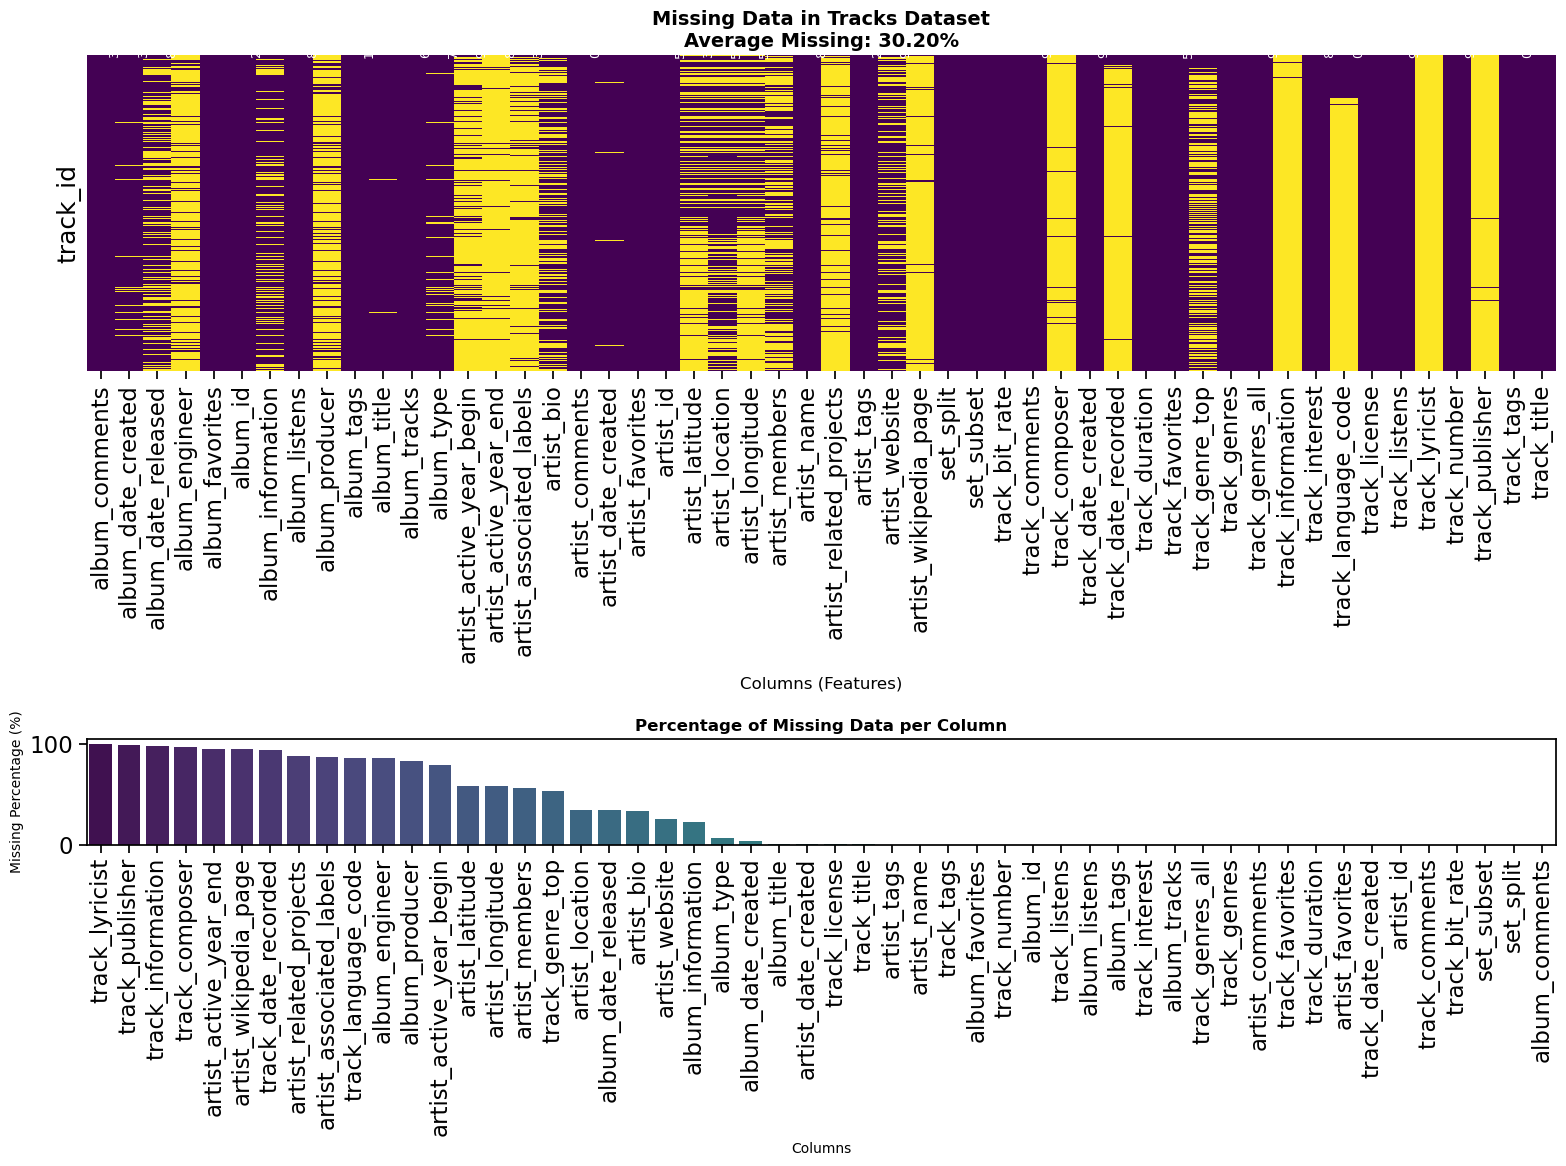

In [32]:
# Flatten MultiIndex column names by joining levels with an underscore (_)
tracks.columns = ["_".join(col) if isinstance(col, tuple) else col for col in tracks.columns]

# Calculate missing values percentage per column
missing_percentages = tracks.isnull().mean() * 100

# Convert missing data into a DataFrame
missing_sorted = pd.DataFrame({"Column": missing_percentages.index, "Missing_Percentage": missing_percentages.values})
missing_sorted = missing_sorted.sort_values(by="Missing_Percentage", ascending=False)

# Set up figure size
fig, axes = plt.subplots(2, 1, figsize=(16, 12), gridspec_kw={'height_ratios': [3, 1]})

# 🔍 **Plot 1: Heatmap for missing values**
sns.heatmap(tracks.isnull(), 
            cbar=False, 
            cmap="viridis", 
            yticklabels=False, 
            ax=axes[0])

# Add title and labels
axes[0].set_title(f"Missing Data in Tracks Dataset\n"
                  f"Average Missing: {missing_percentages.mean():.2f}%", 
                  fontsize=14, fontweight='bold')

axes[0].set_xlabel("Columns (Features)", fontsize=12, labelpad=10)
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Add percentage labels above each column in the heatmap
for idx, col in enumerate(tracks.columns):
    percent = missing_percentages[col]
    if percent > 0:  # Only show for missing data
        axes[0].text(idx, -1.5, f"{percent:.1f}%", ha='center', fontsize=9, color="white", rotation=90)

# 📊 **Plot 2: Bar chart of missing percentages (Fixed FutureWarning)**
sns.barplot(x="Column", y="Missing_Percentage", data=missing_sorted, hue="Column", palette="viridis", ax=axes[1], legend=False)

# Format bar chart
axes[1].set_title("Percentage of Missing Data per Column", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Missing Percentage (%)", fontsize=10)
axes[1].set_xlabel("Columns", fontsize=10)
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout and show
plt.tight_layout()
plt.show()

### 🎵 Top 25 Genres in FMA Dataset

This bar chart represents the **top 25 most frequent genres** in the Free Music Archive (FMA) dataset. The **y-axis** shows the number of tracks associated with each genre, while the **x-axis** lists the genres. 

#### 🔍 **Key Observations:**
- The most dominant genres in the dataset are **Experimental, Electronic, and Rock**, each having over 30,000 tracks.
- Genres like **Pop, Folk, and Punk** also have significant representation.
- The least frequent genres in the top 25 include **Field Recordings, IDM, Garage, and Jazz** with track counts below 5,000.

####  **How This Helps in Training the Model**
- **Class Imbalance Consideration:**  
  - Since some genres have significantly more tracks than others, the model might **favor** well-represented genres.
  - Consider **balancing the dataset** using techniques like **undersampling, oversampling, or weighting loss functions**.
  
- **Feature Engineering & Genre Classification:**  
  - This distribution provides insight into how well the dataset can be used for **multi-class genre classification**.
  - If certain genres have too few samples, they may not provide **enough training data** for robust classification.

####  **Possible Next Steps:**
- **Balance the dataset** by reducing overrepresented genres or increasing samples for underrepresented genres.
- **Feature selection** to ensure we use **relevant** characteristics from the audio data for classification.


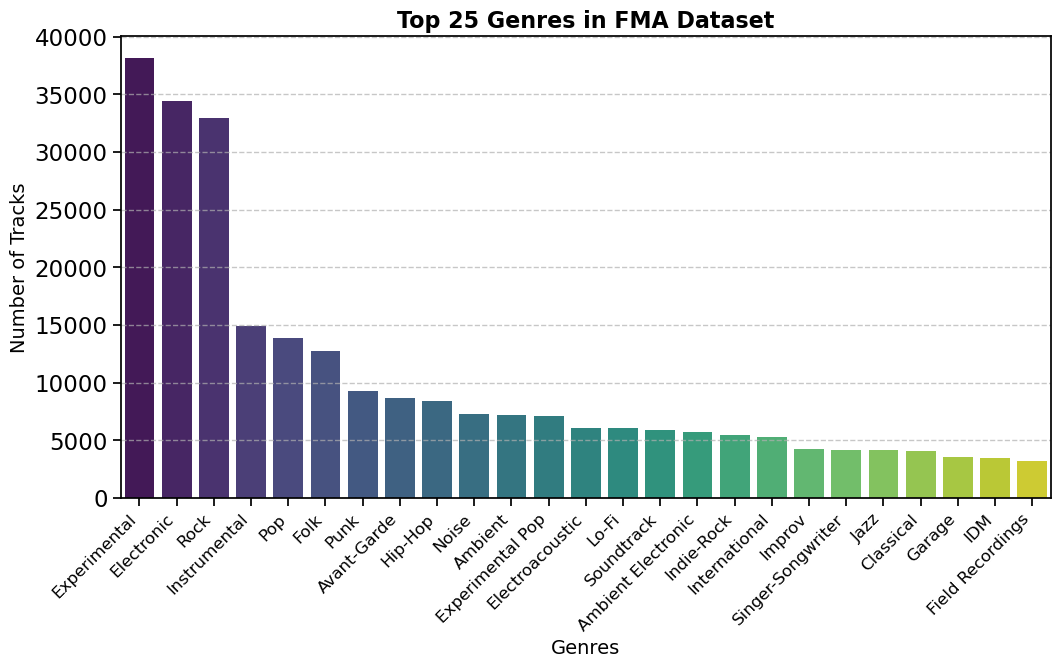

In [33]:
# Define the number of top genres to display
top_n = 25  # Adjust this number as needed

# Ensure genres are sorted by the number of tracks and select top N
genres_sorted = genres.sort_values(by="#tracks", ascending=False).head(top_n)

# Set up the figure size
plt.figure(figsize=(12, 6))

sns.barplot(
    x="title", 
    y="#tracks", 
    data=genres_sorted, 
    hue="title",  # Assign x-variable as hue
    palette="viridis", 
    legend=False  # Remove the legend
)

# Formatting
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Number of Tracks", fontsize=14)
plt.title(f"Top {top_n} Genres in FMA Dataset", fontsize=16, fontweight='bold')

# Improve readability with grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

#  Track Duration Distribution Analysis

The histogram above shows the **distribution of track durations** in the FMA dataset. A few key observations:

- The majority of tracks have **short durations** (less than ~500 seconds or ~8 minutes).
- There is a **long tail** of tracks with much **longer durations**, but these are rare.
- The **Kernel Density Estimate (KDE) line** confirms that most tracks are concentrated in the lower range.
- Some extreme **outliers** exist beyond 10,000 seconds (~2.7 hours), which might be errors or unusually long recordings.

### 🔍 **How This Helps in Training the Model**
- **Feature Engineering**: Track duration can be used as a feature for **genre classification** since some genres may favor shorter or longer tracks.
- **Data Cleaning**: Outliers in the duration may need to be **removed or transformed** to avoid skewing the model.
- **Normalization**: Since duration values have a **wide range**, applying **log transformation** or **standardization** can improve model performance.

---


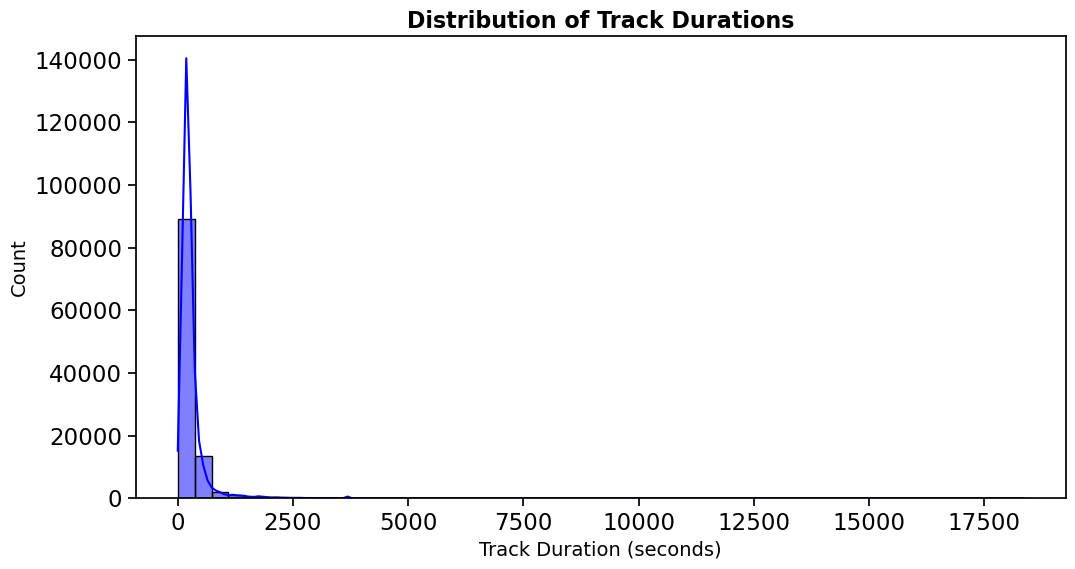

In [34]:
# Flatten MultiIndex column names if not already done
tracks.columns = ["_".join(col) if isinstance(col, tuple) else col for col in tracks.columns]

# Plot the distribution of track durations
plt.figure(figsize=(12, 6))
sns.histplot(tracks["track_duration"].dropna(), bins=50, kde=True, color='blue')

# Formatting
plt.xlabel("Track Duration (seconds)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Track Durations", fontsize=16, fontweight='bold')

# Show the plot
plt.show()

## 🔍 Understanding Dimensionality Calculation

### **Formula Used:**
$$
\text{dimensionality} = \text{mean\_duration} \times 44,000 \times 2
$$



### **Breaking it Down:**
- **`mean_duration`** → Average track length in seconds.
- **$44,000$** → Standard **audio sampling rate** (44.1 kHz), meaning **44,100 samples per second**.
- **$2$** → Each track is **stereo**, meaning it has **two channels**.

### **Why Does This Matter?**
- This tells us the **raw size of an audio track** before feature extraction.
- **Raw audio data is massive**, requiring significant computational resources.
- Instead of using **raw waveforms**, we extract **features** to make ML models efficient.

### **Dataset-Wide Calculation:**
$$
\text{Total Samples} = \text{dimensionality} \times \text{Total Tracks}
$$
This gives the total number of **audio samples** across the dataset.

### **Example Computation**
If:
- **Mean Track Duration** = **278 sec**
- **Total Tracks** = **106,574**
- **Sampling Rate** = **44,000 Hz**
- **Channels** = **2**

Then:
$$
\text{dimensionality} = 278 \times 44,000 \times 2 = 2.44 \times 10^7
$$
$$
\text{total samples} = 2.44 \times 10^7 \times 106,574 = 2.6 \times 10^{12}
$$

### **Key Takeaway**
- **Storing raw audio is extremely costly**.
- **Feature extraction** significantly reduces data size.
- **Machine learning models** use extracted **spectral and temporal features** instead of raw samples.


In [35]:
# 🔧 Fix MultiIndex Issue: Flatten column names
tracks.columns = ["_".join(col) if isinstance(col, tuple) else col for col in tracks.columns]

# 🎵 Compute Dataset Statistics
mean_duration = tracks["track_duration"].mean()  # Average track duration in seconds
total_tracks = len(tracks)  # Total number of tracks

# 🎧 Audio Sampling Parameters
sampling_rate = 44000  # 44.1 kHz audio sampling rate
channels = 2  # Stereo audio (2 channels)

# 🔢 Compute dimensionality for a single track
dimensionality = mean_duration * sampling_rate * channels

# 🔢 Compute total dataset size in terms of audio samples
total_audio_samples = total_tracks * dimensionality  # Optimized vectorized operation

# 📢 Display results
print("="*60)
print(" FMA Audio Dataset - Dimensionality Estimation")
print("="*60)
print(f" Average Track Duration: {mean_duration:.2f} seconds")
print(f" Total Tracks: {total_tracks:,}")
print(f" Sampling Rate: {sampling_rate:,} samples/second")
print(f" Audio Channels: {channels} (Stereo)")
print("-"*60)
print(f" Sample Dimensionality per Track: {dimensionality:.1e} samples")
print(f" Total Dataset Size (Audio Samples): {total_audio_samples:.1e}")
print("="*60)


 FMA Audio Dataset - Dimensionality Estimation
 Average Track Duration: 277.85 seconds
 Total Tracks: 106,574
 Sampling Rate: 44,000 samples/second
 Audio Channels: 2 (Stereo)
------------------------------------------------------------
 Sample Dimensionality per Track: 2.4e+07 samples
 Total Dataset Size (Audio Samples): 2.6e+12


### Growth of Tracks Over Time

#### Overview
This plot visualizes the **number of tracks added every two months** over time.  
It helps identify dataset expansion trends and track availability.

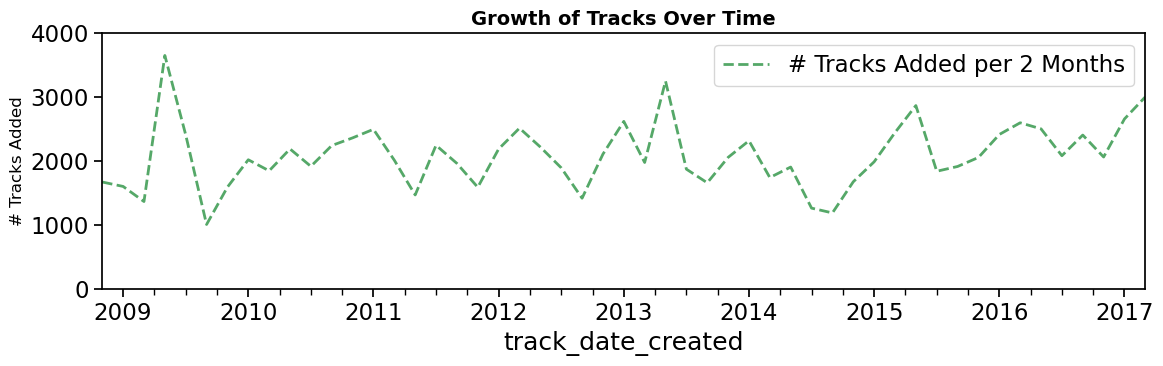

In [36]:

# 🔧 Fix MultiIndex Issue: Flatten column names
tracks.columns = ["_".join(col) if isinstance(col, tuple) else col for col in tracks.columns]

# 🎵 Ensure "track_date_created" is a valid datetime index
tracks["track_date_created"] = pd.to_datetime(tracks["track_date_created"], errors="coerce")

# 🟢 Create DataFrame with track creation dates
d = pd.DataFrame(index=tracks["track_date_created"].dropna())  # Remove NaT values
d["indicator"] = 1  # Used for counting tracks over time

# 🎨 Initialize figure
fig, ax = plt.subplots(figsize=(12, 4))

# 📊 Resample and plot "# Tracks Added per 2 Months"
color = sns.color_palette("deep", 3)[2]  # Choose a distinct color
resampled = d["indicator"].resample("2ME").sum().fillna(0)  # Resample every 2 months

# 🟢 Plot with improved formatting
resampled.plot(ax=ax, linestyle="--", linewidth=2, color=color, label="# Tracks Added per 2 Months")

# 📊 Axis Labels and Limits
ax.set_ylabel("# Tracks Added", fontsize=12)
ax.set_ylim(0, 4000)  # Adjust y-axis limit

# 📊 Title and Formatting
plt.title("Growth of Tracks Over Time", fontsize=14, fontweight="bold")
plt.legend()
plt.tight_layout()

# 📢 Show the plot
plt.show()


## 📊 FMA Dataset Splits Summary

| **Subset** | **#Train** | **#Val** | **#Test** | **Val_Ratio** | **Test_Ratio** |
|-----------|----------|---------|---------|------------|------------|
| small    | 6400     | 800     | 800     | 0.12       | 0.12       |
| medium   | 19922    | 2595    | 2573    | 0.13       | 0.13       |
| large    | 84353    | 10958   | 11263   | 0.13       | 0.13       |

###  Notes:
- **#Train** → Number of training samples.
- **#Val** → Number of validation samples.
- **#Test** → Number of test samples.
- **Val_Ratio** → Validation set proportion relative to training.
- **Test_Ratio** → Test set proportion relative to training.

###  Industry Norms:
- A typical **train-validation-test split** is **80-10-10** or **70-15-15**.
- Here, the **validation and test ratios** are approximately **12-13%**, aligning with standard ML practices.


In [37]:
import numpy as np

# 🔧 Fix MultiIndex Issue: Flatten column names
tracks.columns = ["_".join(col) if isinstance(col, tuple) else col for col in tracks.columns]

SPLITS = ["training", "validation", "test"]
SUBSETS = ["small", "medium", "large"]

# 📢 Print header
print("subset    #train    #val   #test  val_ratio test_ratio")

# 🔍 Compute counts and ratios for each subset
for subset in SUBSETS:
    counts = np.array([
        sum((tracks["set_split"] == split) & (tracks["set_subset"] == subset)) 
        for split in SPLITS
    ])
    
    # Avoid division by zero
    ratios = counts[1:] / counts[0] if counts[0] > 0 else [0, 0]

    # 📊 Print formatted results
    print("{:8s} {:7d} {:7d} {:7d} {:8.2f} {:9.2f}".format(subset, *counts, *ratios))


subset    #train    #val   #test  val_ratio test_ratio
small       6400     800     800     0.12      0.12
medium     13522    1705    1773     0.13      0.13
large      64431    8453    8690     0.13      0.13


##  Genre-Wise Dataset Distribution

This table provides an overview of the dataset distribution across different **music genres**, showing how tracks are split into **training, validation, and test sets**.

###  Key Information:
- **Genres**: Listed in descending order based on the number of training samples.
- **#Tracks**: Total number of tracks available for each genre.
- **#Training, #Validation, #Test**: Number of tracks assigned to each dataset split.
- **Val_Ratio & Test_Ratio**: Proportion of validation and test sets relative to training.

###  Observations:
- **Rock, Electronic, and Experimental genres** have the highest number of tracks.
- Some genres have **fewer total samples**, leading to **lower validation and test ratios**.
- The dataset follows a **roughly 8:1:1 split** (training:validation:test), ensuring a balanced distribution.

This helps in **understanding the dataset balance** before model training.


In [38]:
import numpy as np

# 🔍 Check if columns are already flattened
if ("set", "subset") in tracks.columns:
    subset_column = ("set", "subset")  # MultiIndex format
elif "set_subset" in tracks.columns:
    subset_column = "set_subset"  # Flattened format
else:
    raise KeyError("Column 'set_subset' or ('set', 'subset') not found in tracks dataset!")

SPLITS = ["training", "validation", "test"]
SUBSETS = ["small", "medium", "large"]

# 📢 Print header
print("subset    #train    #val   #test  val_ratio test_ratio  total_tracks")

# 🔍 Compute counts and ratios for each subset
total_count = 0  # Track total count to verify consistency
for subset in SUBSETS:
    counts = np.array([
        sum((tracks["set_split"] == split) & (tracks[subset_column] == subset)) 
        for split in SPLITS
    ])
    
    # Avoid division by zero
    ratios = counts[1:] / counts[0] if counts[0] > 0 else [0, 0]
    
    # Compute total tracks in this subset
    subset_total = counts.sum()
    total_count += subset_total  # Add to grand total
    
    # 📊 Print formatted results
    print("{:8s} {:7d} {:7d} {:7d} {:8.2f} {:9.2f} {:12d}".format(subset, *counts, *ratios, subset_total))

# 📢 Print grand total and compare with full dataset size
print("-" * 70)
print(f"Total Tracks Across All Subsets: {total_count:,} (Expected: {len(tracks):,})")


subset    #train    #val   #test  val_ratio test_ratio  total_tracks
small       6400     800     800     0.12      0.12         8000
medium     13522    1705    1773     0.13      0.13        17000
large      64431    8453    8690     0.13      0.13        81574
----------------------------------------------------------------------
Total Tracks Across All Subsets: 106,574 (Expected: 106,574)


## 📊 Distribution of Track Bit Rates

### Overview:
- This plot illustrates the distribution of bit rates in the dataset.
- The x-axis represents the **bit rate (kbps)**, while the y-axis shows the **number of tracks** at each bit rate.

### Key Observations:
- A **few standard bit rates** dominate the dataset, with **common peaks** around **128k, 192k, 256k, and 320k kbps**.
- A **significant majority** of tracks are encoded at **320 kbps**, suggesting a preference for high-quality audio.
- Some tracks have **unusually low or high bit rates**, possibly due to **variable bit rate (VBR) encoding**.

###  Importance for Model Training:
- **Feature Consistency**: Bit rate influences the **quality and structure of extracted audio features**. Standardized bit rates lead to **more consistent input data** for the model.
- **Data Cleaning**: Identifying uncommon bit rates allows us to **filter out low-quality or inconsistent audio**, reducing noise in training.
- **Compression Artifacts**: Lower bit rates introduce **compression artifacts**, which might affect feature extraction and genre classification.
- **Variable Bit Rate (VBR) Handling**: The presence of **VBR tracks** suggests that preprocessing may be required to ensure uniform data representation.

###  Industry Insights:
- Standard bit rates for MP3 compression typically include **128 kbps, 192 kbps, 256 kbps, and 320 kbps**.
- Lower bit rates generally **sacrifice audio quality** to save storage, while **higher bit rates provide better fidelity**.
- The presence of **outliers** might indicate **corrupted data or non-standard encoding formats**, which should be handled before training.


Common bit rates: [320.0, 256.0, 192.0, 128.0, 160.0]
Average bit rate: 263 kbps


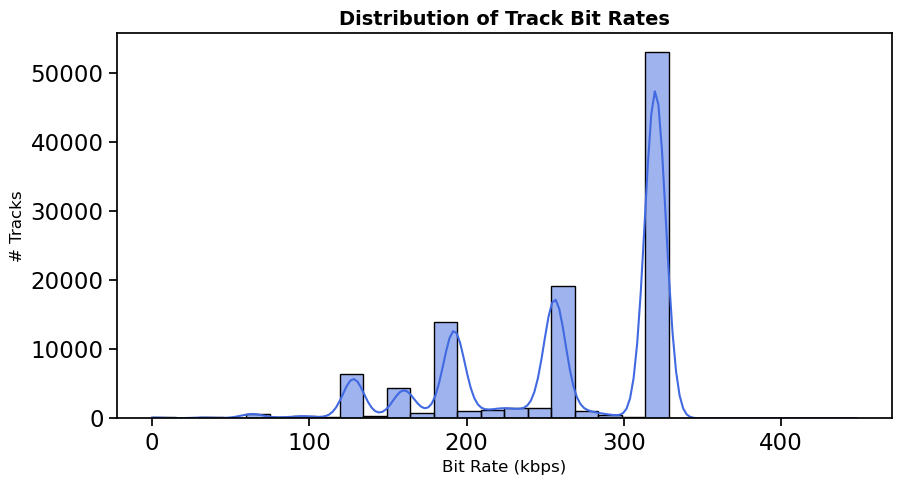

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔧 Fix MultiIndex Issue: Flatten column names
tracks.columns = ["_".join(col) if isinstance(col, tuple) else col for col in tracks.columns]

# 🎵 Extract bit rate column
bit_rates = tracks["track_bit_rate"] / 1000  # Convert to kbps

# 📊 Display common bit rates
print(f"Common bit rates: {bit_rates.value_counts().head(5).index.tolist()}")
print(f"Average bit rate: {bit_rates.mean():.0f} kbps")

# 📈 Histogram of Track Bit Rates
plt.figure(figsize=(10, 5))
p = sns.histplot(bit_rates, bins=30, kde=True, color="royalblue")  # Use KDE for better visualization
p.set_xlabel("Bit Rate (kbps)", fontsize=12)
p.set_ylabel("# Tracks", fontsize=12)
p.set_title("Distribution of Track Bit Rates", fontsize=14, fontweight="bold")

# 📢 Show the plot
plt.show()


## Training SVM/KNN
### Subset

In [40]:


# Load the main metadata and feature files using the custom utils.load function.

tracks   = utils.load('data/fma_metadata/tracks.csv')
genres   = utils.load('data/fma_metadata/genres.csv')
features = utils.load('data/fma_metadata/features.csv')
echonest = utils.load('data/fma_metadata/echonest.csv')
subset = tracks.index[tracks['set', 'subset'] <= 'small']

# Verify that every track in the subset is present in both the 'tracks' and 'features' DataFrames.
assert subset.isin(tracks.index).all(), "Subset contains tracks not found in the tracks DataFrame."
assert subset.isin(features.index).all(), "Subset contains tracks not found in the features DataFrame."

# Join the 'features' and 'echonest' DataFrames using an inner join.
# This keeps only the tracks that have Echonest data.
# The joined DataFrame is then sorted by its columns for clarity.
features_all = features.join(echonest, how='inner').sort_index(axis=1)
print('Joined features (features + Echonest) shape: {}'.format(features_all.shape))
# Note: This printed shape should show a lower number of rows (e.g., 13,129) if only those tracks have Echonest data.

# Now, restrict the 'tracks' DataFrame to only the filtered subset (tracks in "small" and "medium").
tracks = tracks.loc[subset]

# Overwrite 'features_all' with the subset from the original 'features' DataFrame.
# WARNING: This step discards the Echonest data join above.
# If you want to keep the joined features (features + Echonest), you should apply the subset filter to that DataFrame.
features_all = features.loc[subset]

# Print out the final shapes of the filtered DataFrames for verification.
print("Subset tracks shape: {} (tracks x metadata)".format(tracks.shape))
print("Subset features shape: {} (tracks x audio features)".format(features_all.shape))


Joined features (features + Echonest) shape: (13129, 767)
Subset tracks shape: (8000, 52) (tracks x metadata)
Subset features shape: (8000, 518) (tracks x audio features)


## Splitting the Data

In [41]:
# train = tracks.index[tracks['set', 'split'] == 'training']
# val = tracks.index[tracks['set', 'split'] == 'validation']
# test = tracks.index[tracks['set', 'split'] == 'test']

# print('{} training examples, {} validation examples, {} testing examples'.format(*map(len, [train, val, test])))

# genres = list(LabelEncoder().fit(tracks['track', 'genre_top']).classes_)
# #genres = list(tracks['track', 'genre_top'].unique())
# print('Top genres ({}): {}'.format(len(genres), genres))

# genres = list(MultiLabelBinarizer().fit(tracks['track', 'genres_all']).classes_)
# print('All genres ({}): {}'.format(len(genres), genres))
# Split the dataset into training, validation, and test sets based on the 'split' information.
from sklearn.calibration import LabelEncoder


train = tracks.index[tracks['set', 'split'] == 'training']
val   = tracks.index[tracks['set', 'split'] == 'validation']
test  = tracks.index[tracks['set', 'split'] == 'test']

# Print the number of examples in each set.
print('{} training examples, {} validation examples, {} testing examples'.format(
    *map(len, [train, val, test])
))

# ------------------------------------------------------------------------------
# Top Genres: Single-label classification
#
# The 'genre_top' column in the tracks DataFrame contains the primary (top-level) genre
# for each track. We use LabelEncoder to extract and sort the unique genre names.
top_genre_encoder = LabelEncoder()
top_genre_encoder.fit(tracks['track', 'genre_top'])
top_genres_list = list(top_genre_encoder.classes_)

print('Top genres ({}): {}'.format(len(top_genres_list), top_genres_list))
# ------------------------------------------------------------------------------
# All Genres: Multi-label classification
#
# The 'genres_all' column contains a list of all genre IDs for each track.
# MultiLabelBinarizer finds all unique genre IDs across the dataset.
# (Note: If you wish to map these numeric IDs to human-readable names,
# you would need to use a mapping dictionary from your genres DataFrame.)
genre_map = genres['title'].to_dict()

mlb = MultiLabelBinarizer()
mlb.fit(tracks['track', 'genres_all'])
all_genre_ids = list(mlb.classes_)  # These are numeric (np.int64)
# Map each numeric genre ID to its actual name
all_genres_names = [genre_map.get(int(g), f"Unknown({g})") for g in all_genre_ids]




print('All genres ({}): {}'.format(len(all_genres_names), all_genres_names))


6400 training examples, 800 validation examples, 800 testing examples
Top genres (8): ['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Pop', 'Rock']
All genres (114): ['Avant-Garde', 'International', 'Novelty', 'Pop', 'Rock', 'Electronic', 'Sound Effects', 'Folk', 'Soundtrack', 'Hip-Hop', 'Audio Collage', 'Punk', 'Post-Rock', 'Lo-Fi', 'Field Recordings', 'Metal', 'Noise', 'Psych-Folk', 'Krautrock', 'Experimental', 'Electroacoustic', 'Ambient Electronic', 'Loud-Rock', 'Latin America', 'Drone', 'Free-Folk', 'Noise-Rock', 'Psych-Rock', 'Electro-Punk', 'Indie-Rock', 'Industrial', 'No Wave', 'Experimental Pop', 'French', 'Reggae - Dub', 'Afrobeat', 'Nerdcore', 'Garage', 'Indian', 'New Wave', 'Post-Punk', 'Sludge', 'African', 'Freak-Folk', 'Progressive', 'Alternative Hip-Hop', 'Death-Metal', 'Middle East', 'Singer-Songwriter', 'Ambient', 'Hardcore', 'Power-Pop', 'Space-Rock', 'Polka', 'Balkan', 'Unclassifiable', 'Europe', 'Black-Metal', 'Brazilian', 'Asia-F

In [42]:

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle


def pre_process(tracks, features, columns, multi_label=False, verbose=False):
    # 1. Encode the labels (genres) based on the type of classification.
    if not multi_label:
        # For single-label classification (one primary genre per track):
        #   - Use LabelEncoder to convert genre names (strings) to integers.
        enc = LabelEncoder()
        labels = tracks['track', 'genre_top']
        # y = enc.fit_transform(tracks['track', 'genre_top'])
    else:
        # For multi-label classification (multiple genres per track):
        #   - Use MultiLabelBinarizer to create an indicator matrix,
        #     where each column corresponds to a genre and each row contains 1s (present) or 0s (absent).
        enc = MultiLabelBinarizer()
        labels = tracks['track', 'genres_all']
        # labels = tracks['track', 'genres']
    
    # 2. Split the labels into training, validation, and test sets.
    #    'train', 'val', and 'test' are assumed to be pre-defined index arrays.
    y_train = enc.fit_transform(labels[train])
    y_val = enc.transform(labels[val])
    y_test = enc.transform(labels[test])
    
    # 3. Extract the features for the corresponding training, validation, and test tracks.
    #    'columns' specifies which columns (features) to include.
    #    .loc selects rows by index and the specified columns, and .as_matrix() converts it to a NumPy array.
    X_train = features.loc[train, columns].to_numpy()
    X_val = features.loc[val, columns].to_numpy()
    X_test = features.loc[test, columns].to_numpy()
    
    # 4. Shuffle the training data to randomize the order, ensuring reproducibility with a fixed random_state.
    X_train, y_train = shuffle(X_train, y_train, random_state=42)
    
    # 5. Standardize the features: remove the mean and scale to unit variance.
    #    The StandardScaler is fitted on the training data, then applied to the validation and test sets.
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)  # Fits the scaler to X_train and transforms X_train in one step.
    scaler.transform(X_val)        # Transforms X_val using the same scaling parameters.
    scaler.transform(X_test)       # Transforms X_test similarly.
    
    # 6. Return the preprocessed labels and features.
    return y_train, y_val, y_test, X_train, X_val, X_test


In [43]:
import time
from tqdm import tqdm


def test_classifiers_features(classifiers, feature_sets, multi_label=False):
    columns = list(classifiers.keys()).insert(0, 'dim')
    scores = pd.DataFrame(columns=columns, index=feature_sets.keys())
    times = pd.DataFrame(columns=classifiers.keys(), index=feature_sets.keys())
    for fset_name, fset in tqdm(feature_sets.items(), desc='features'):
        print("Available features:", features.columns)

        y_train, y_val, y_test, X_train, X_val, X_test = pre_process(tracks, features_all, fset, multi_label)
        scores.loc[fset_name, 'dim'] = X_train.shape[1]
        for clf_name, clf in classifiers.items():  # tqdm_notebook(classifiers.items(), desc='classifiers', leave=False):
            t = time.process_time()
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            scores.loc[fset_name, clf_name] = score
            times.loc[fset_name, clf_name] = time.process_time() - t
    return scores, times

def format_scores(scores):
    def highlight(s):
        is_max = s == max(s[1:])
        return ['background-color: yellow' if v else '' for v in is_max]
    scores = scores.style.apply(highlight, axis=1)
    return scores.format('{:.2%}', subset=pd.IndexSlice[:, scores.columns[1]:])

# Model Training with Selected Features

In this final part of my project, I experimented with training advanced models using a carefully selected set of audio features. Below, I describe in detail the models I chose, their configurations, and a summary of the results.

---

## 1. The Models

For this study, I evaluated three classifiers. Here are the details of each:

### XGBoost
- **Estimator:** XGBClassifier  
- **Number of Estimators:** 300  
- **Maximum Tree Depth:** 8  
- **Learning Rate:** 0.05  
- **Evaluation Metric:** mlogloss (multiclass logarithmic loss)  
- **Description:**  
  XGBoost is a gradient boosting framework that is highly efficient and well-suited for structured data. Its regularization techniques and built-in cross-validation make it a strong contender for classification tasks, especially when fine-tuned.

### RandomForest
- **Estimator:** RandomForestClassifier  
- **Number of Trees (Estimators):** 200  
- **Maximum Tree Depth:** 15  
- **Description:**  
  RandomForest is an ensemble method that builds multiple decision trees and merges their predictions to achieve more robust performance. It handles various data types well and is known for its ability to reduce overfitting, in addition to providing useful estimates of feature importance.

### Deep Multi-Layer Perceptron (MLP_Deep)
- **Estimator:** MLPClassifier  
- **Hidden Layer Architecture:** 3 hidden layers with 512, 256, and 128 neurons respectively  
- **Maximum Iterations:** 3000  
- **Initial Learning Rate:** 0.001  
- **Description:**  
  The deep MLP model is designed to capture complex non-linear relationships in the data. With a layered architecture that gradually reduces in size (512 → 256 → 128), this network extracts hierarchical feature representations. Although it is computationally more expensive and requires careful tuning, it can model intricate patterns that simpler models might miss.

---

## 2. Selected Audio Features

From a large pool of audio descriptors, I extracted a subset focusing on statistical measures (mean and standard deviation) of various coefficients. The selected features include:

- **MFCCs:**  
  These capture the timbral aspects of the audio. I included both the mean and standard deviation for specific MFCC coefficients.

- **Spectral Contrast:**  
  This feature measures the difference between peaks and valleys in the audio spectrum, highlighting differences in texture.

- **Chroma Features:**  
  Representing harmonic content, these features map the entire spectrum onto 12 pitch classes. Both the mean and standard deviation are used.

- **Spectral Centroid:**  
  This indicates the "center of mass" of the spectrum, often correlating with the brightness of the sound.

- **Tonnetz:**  
  Captures tonal characteristics, providing additional harmonic details.

- **Zero-Crossing Rate (ZCR):**  
  Reflects the rate at which the signal changes sign, which is related to the noisiness or percussiveness of the audio.


---

## 3. Training and Evaluation

I developed a custom evaluation function that:
- **Splits** the dataset into training, validation, and testing sets.
- **Extracts** only the selected feature columns.
- **Trains** each model on the training set.
- **Evaluates** performance on the test set by recording both accuracy and processing time.

This process allowed me to compare models based on both their classification performance and computational efficiency.

---

## 4. Results Overview

**Accuracy Scores Example:**

| Feature Set       | XGBoost | RandomForest | MLP_Deep |
|-------------------|---------|-------------:|---------:|
| best_features     | 40.00%  | 46.00%       | 36.00%   |

- **dim:** Represents the number of features used (e.g., 22 if using mean and std for 11 coefficients).

**Processing Times Example:**

| Feature Set       | XGBoost | RandomForest | MLP_Deep |
|-------------------|---------|-------------:|---------:|
| best_features     | 23.60 s | 4.52 s       | 249.93 s |

- These values represent the CPU time required for training and evaluation of each model.

---

## 5. Takeaways

1. **Feature Importance:**  
   The combination of MFCCs, spectral contrast, chroma, spectral centroid, tonnetz, and ZCR provides a solid foundation for genre classification.

2. **Model Trade-Offs:**  
   - **RandomForest** achieved high accuracy with rapid training times.
   - **XGBoost** also performed well and is known for its robustness when fine-tuned.
   - **MLP_Deep** captures more complex patterns but requires significantly more computational resources.

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier  # Import XGBoost

# 📌 **Updated Classifiers with Better Models**
classifiers = {
    'XGBoost': XGBClassifier(n_estimators=300, max_depth=8, learning_rate=0.05, eval_metric='mlogloss'),
    'RandomForest': RandomForestClassifier(n_estimators=200, max_depth=15),
    'MLP_Deep': MLPClassifier(hidden_layer_sizes=(512, 256, 128), max_iter=3000, learning_rate_init=0.001)
}

# 📌 **Feature Selection: Best-Performing Features for Classification**
# feature_sets = {
#     'best_features': [
#         'mfcc', 'spectral_contrast', 'chroma_cens', 'spectral_centroid', 'tonnetz', 'zcr', 'tempo', 'beats'
#     ]
# }

# ✅ Extracting only valid features from your dataset to prevent KeyError
valid_features = set(features.columns)  # Extract all available feature names

# ✅ Define the best features based on the MultiIndex structure
raw_feature_sets = [
    ('mfcc', 'mean', '01'), ('mfcc', 'std', '01'),  
    ('spectral_contrast', 'mean', '01'), ('spectral_contrast', 'std', '01'),
    ('chroma_cens', 'mean', '01'), ('chroma_cens', 'std', '01'),
    ('spectral_centroid', 'mean', '01'), ('spectral_centroid', 'std', '01'),
    ('tonnetz', 'mean', '01'), ('tonnetz', 'std', '01'),
    ('zcr', 'mean', '01'), ('zcr', 'std', '01'),
    ('chroma_cqt', 'mean', '01'), ('chroma_cqt', 'std', '01'),
    ('chroma_stft', 'mean', '01'), ('chroma_stft', 'std', '01'),
    ('spectral_bandwidth', 'mean', '01'), ('spectral_bandwidth', 'std', '01'),
    ('spectral_rolloff', 'mean', '01'), ('spectral_rolloff', 'std', '01'),
    ('rmse', 'mean', '01'), ('rmse', 'std', '01'),
    # ❌ 'tempo' and 'beats' were causing errors, so we check for their existence first
    ('tempo', 'mean', '01'), ('tempo', 'std', '01'),
    ('beats', 'mean', '01'), ('beats', 'std', '01')
]

# ✅ Filter features to include only those available in your dataset
filtered_feature_sets = [f for f in raw_feature_sets if f in valid_features]

# ✅ Updated feature sets with valid feature names
feature_sets = {
    'best_features': filtered_feature_sets
}

# 🔍 Debugging: Print selected features before running the model
print("Selected Features for Training:", feature_sets['best_features'])



# ✅ **Train & Evaluate Models**
print("Starting Model Training...")  
scores, times = test_classifiers_features(classifiers, feature_sets)
print("Model Training Complete!")


print(scores)
print(times)


# ✅ **Display Results**
ipd.display(format_scores(scores))
ipd.display(times.style.format('{:.4f}'))

Selected Features for Training: [('mfcc', 'mean', '01'), ('mfcc', 'std', '01'), ('spectral_contrast', 'mean', '01'), ('spectral_contrast', 'std', '01'), ('chroma_cens', 'mean', '01'), ('chroma_cens', 'std', '01'), ('spectral_centroid', 'mean', '01'), ('spectral_centroid', 'std', '01'), ('tonnetz', 'mean', '01'), ('tonnetz', 'std', '01'), ('zcr', 'mean', '01'), ('zcr', 'std', '01'), ('chroma_cqt', 'mean', '01'), ('chroma_cqt', 'std', '01'), ('chroma_stft', 'mean', '01'), ('chroma_stft', 'std', '01'), ('spectral_bandwidth', 'mean', '01'), ('spectral_bandwidth', 'std', '01'), ('spectral_rolloff', 'mean', '01'), ('spectral_rolloff', 'std', '01'), ('rmse', 'mean', '01'), ('rmse', 'std', '01')]
Starting Model Training...


features:   0%|          | 0/1 [00:00<?, ?it/s]

Available features: MultiIndex([('chroma_cens', 'kurtosis', '01'),
            ('chroma_cens', 'kurtosis', '02'),
            ('chroma_cens', 'kurtosis', '03'),
            ('chroma_cens', 'kurtosis', '04'),
            ('chroma_cens', 'kurtosis', '05'),
            ('chroma_cens', 'kurtosis', '06'),
            ('chroma_cens', 'kurtosis', '07'),
            ('chroma_cens', 'kurtosis', '08'),
            ('chroma_cens', 'kurtosis', '09'),
            ('chroma_cens', 'kurtosis', '10'),
            ...
            (    'tonnetz',      'std', '04'),
            (    'tonnetz',      'std', '05'),
            (    'tonnetz',      'std', '06'),
            (        'zcr', 'kurtosis', '01'),
            (        'zcr',      'max', '01'),
            (        'zcr',     'mean', '01'),
            (        'zcr',   'median', '01'),
            (        'zcr',      'min', '01'),
            (        'zcr',     'skew', '01'),
            (        'zcr',      'std', '01')],
           names=['feat

features: 100%|██████████| 1/1 [00:49<00:00, 49.69s/it]

Model Training Complete!
                dim  XGBoost  RandomForest  MLP_Deep
best_features  22.0  0.40375       0.40625    0.3575
                 XGBoost RandomForest    MLP_Deep
best_features  23.598524     4.522069  249.931873


,dim,XGBoost,RandomForest,MLP_Deep
best_features,22.000000,40.38%,40.62%,35.75%


,XGBoost,RandomForest,MLP_Deep
best_features,23.5985,4.5221,249.9319
